In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/movieReplicationSet.csv")

In [2]:
df.head(3)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0


In [3]:
df.iloc[:, 474:].head(3)

,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,1.0,0,1
1,1.0,0,0
2,1.0,1,0


#### Q1 Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

In [4]:
median_ratings = df.iloc[:, :400].count(axis=0).median()
high_popularity_movies = df.iloc[:, :400].count(axis=0) >= median_ratings
low_popularity_movies = df.iloc[:, :400].count(axis=0) < median_ratings
high_popularity_indices = high_popularity_movies[high_popularity_movies].index
low_popularity_indices = low_popularity_movies[low_popularity_movies].index
high_df = df[high_popularity_indices]
low_df = df[low_popularity_indices]
low_df.head()

,The Life of David Gale (2003),Wing Commander (1999),Snatch (2000),Rambo: First Blood Part II (1985),Let the Right One In (2008),The Machinist (2004),Brazil (1985),Change of Habit (1969),Night of the Living Dead (1968),Man on Fire (2004),...,On Golden Pond (1981),The Descent (2005),Runaway Bride (1999),Gods and Generals (2003),My Father and My Son (2005),The Usual Suspects (1995),Patton (1970),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,1.5,NaN,NaN


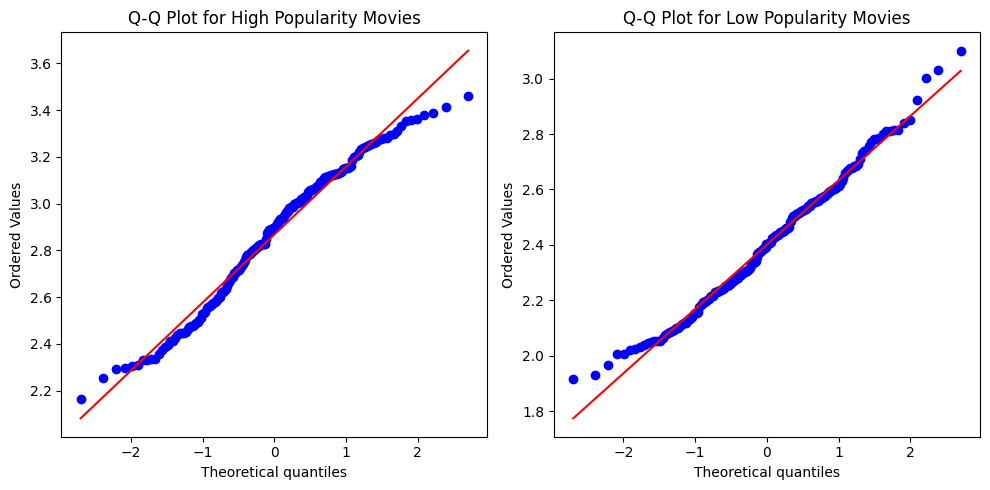

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

#high popularity movies
probplot(high_df.mean(axis=0).dropna(), plot=axes[0])
axes[0].set_title('Q-Q Plot for High Popularity Movies')
# low popularity movies
probplot(low_df.mean(axis=0).dropna(), plot=axes[1])
axes[1].set_title('Q-Q Plot for Low Popularity Movies')

plt.tight_layout()
plt.savefig('q1_qq_plots.png')
plt.show()

In [6]:
from scipy.stats import ttest_ind
high_avg_ratings = high_df.mean(axis=0).dropna()
low_avg_ratings = low_df.mean(axis=0).dropna()

t_stat, p_value = ttest_ind(high_avg_ratings, low_avg_ratings)
t_stat, p_value

(17.7560492698737, 2.2696530276564846e-52)

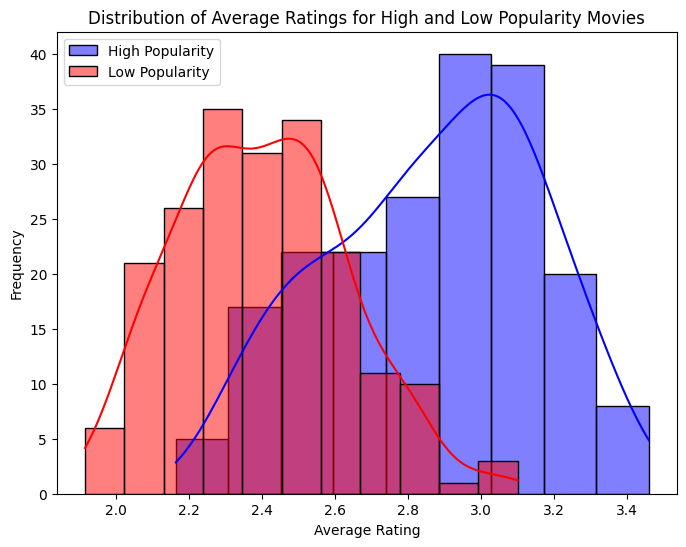

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))


sns.histplot(high_avg_ratings, kde=True, color='blue', label='High Popularity', ax=ax)
sns.histplot(low_avg_ratings, kde=True, color='red', label='Low Popularity', ax=ax)

ax.legend()
ax.set_title('Distribution of Average Ratings for High and Low Popularity Movies')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Frequency')
plt.savefig('q1_distribution_plots.png')
plt.show()

#### Question 2 Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

In [8]:
years = df.columns[:400].str.extract(r'\((\d{4})\)')[0].astype(float)
median_year = years.median()
new_movies = years >= median_year
old_movies = years < median_year


new_movies_indices = new_movies[new_movies].index
old_movies_indices = old_movies[old_movies].index
new_movies_titles = df.columns[new_movies_indices]
old_movies_titles = df.columns[old_movies_indices]
new_df = df[new_movies_titles]
old_df = df[old_movies_titles]

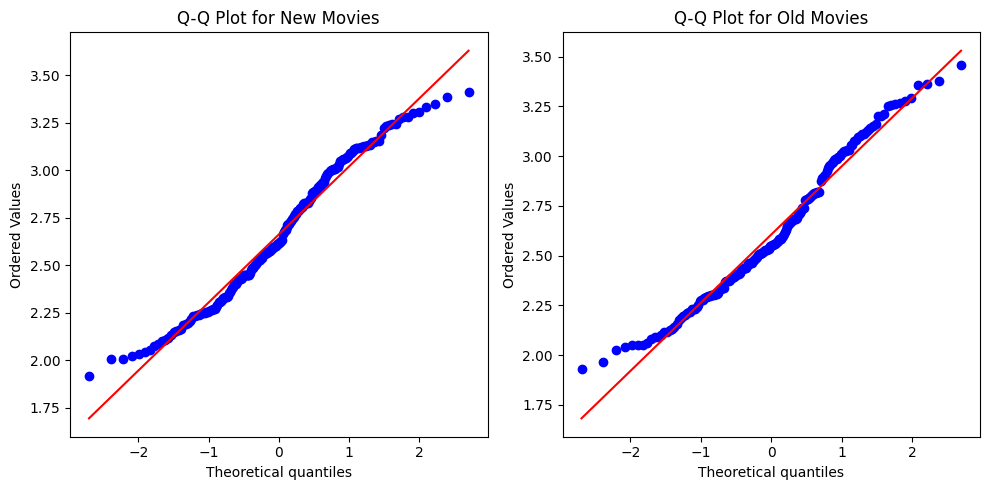

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

probplot(new_df.mean(axis=0).dropna(), plot=axes[0])
axes[0].set_title('Q-Q Plot for New Movies')

probplot(old_df.mean(axis=0).dropna(), plot=axes[1])
axes[1].set_title('Q-Q Plot for Old Movies')
plt.tight_layout()
plt.savefig('q2_qq_plots.png')
plt.show()


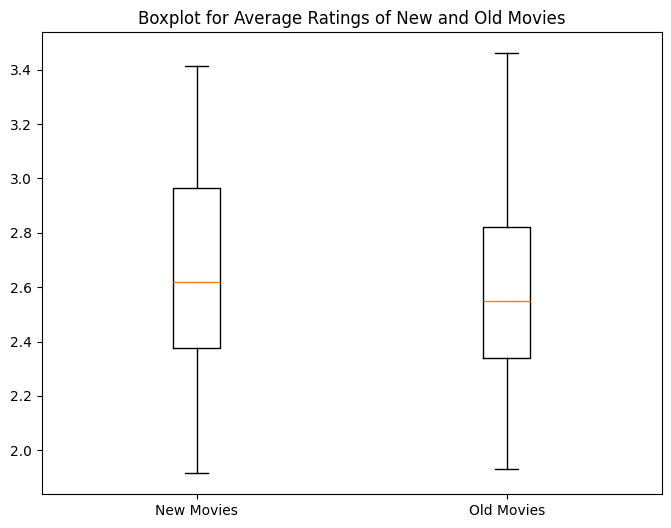

In [10]:
# Boxplot for average ratings comparison
fig, ax = plt.subplots(figsize=(8, 6))

data = [new_df.mean(axis=0).dropna(), old_df.mean(axis=0).dropna()]
labels = ['New Movies', 'Old Movies']

ax.boxplot(data, labels=labels)
ax.set_title('Boxplot for Average Ratings of New and Old Movies')
plt.savefig('q2_boxplot.png')
plt.show()

In [11]:
t_stat, p_value = ttest_ind(new_df.mean(axis=0).dropna(), old_df.mean(axis=0).dropna())

t_stat, p_value

(1.605479609469478, 0.1091814139798275)

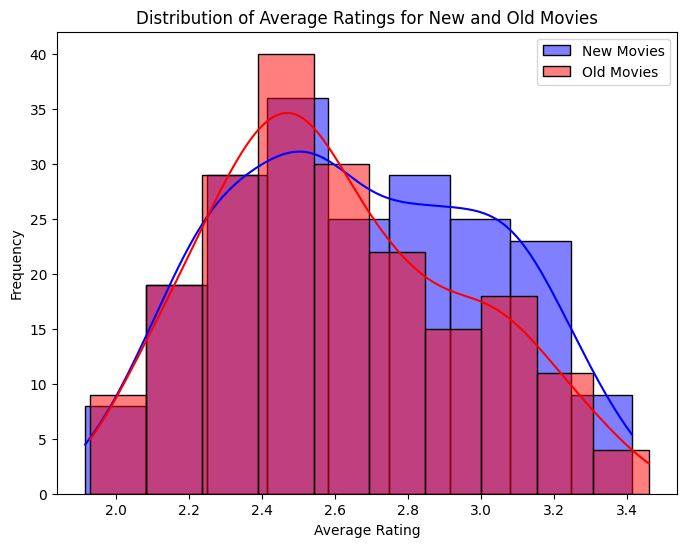

In [12]:
# Plot the distributions of average ratings for new and old movies
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(new_df.mean(axis=0).dropna(), kde=True, label='New Movies', color='blue', ax=ax)
sns.histplot(old_df.mean(axis=0).dropna(), kde=True, label='Old Movies', color='red', ax=ax)

ax.set_title('Distribution of Average Ratings for New and Old Movies')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Frequency')
ax.legend()
plt.savefig('q2_distribution.png')
plt.show()

#### Q3 Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [13]:
shrek_ratings = df['Shrek (2001)']
gender_data = df['Gender identity (1 = female; 2 = male; 3 = self-described)']
male_ratings = shrek_ratings[gender_data == 2].dropna()
female_ratings = shrek_ratings[gender_data == 1].dropna()

#independent two-sample t-test
t_stat, p_value = ttest_ind(male_ratings, female_ratings)
t_stat, p_value

(-1.1016699726285888, 0.27087511813734183)

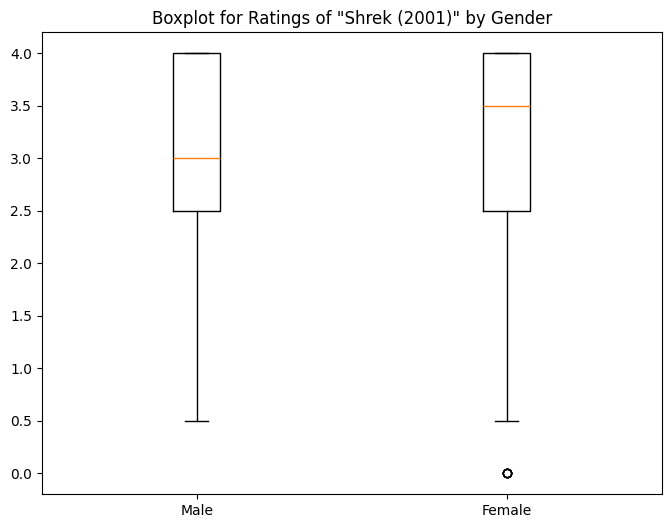

In [14]:
# Boxplot for average ratings comparison
fig, ax = plt.subplots(figsize=(8, 6))

data = [male_ratings, female_ratings]
labels = ['Male', 'Female']

ax.boxplot(data, labels=labels)
ax.set_title('Boxplot for Ratings of "Shrek (2001)" by Gender')
plt.savefig('q3_boxplot.png')
plt.show()

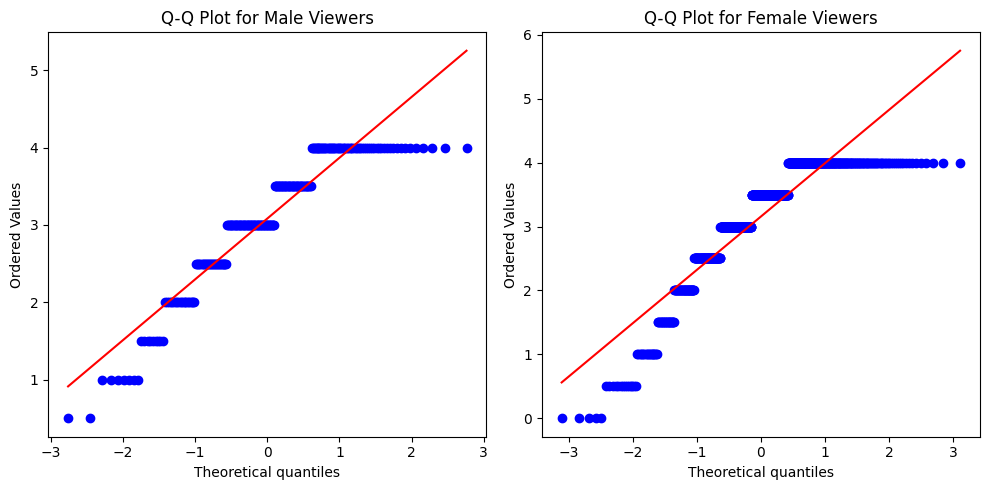

In [15]:
# Q-Q plots for normality
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
probplot(male_ratings, plot=axes[0])
axes[0].set_title('Q-Q Plot for Male Viewers')
probplot(female_ratings, plot=axes[1])
axes[1].set_title('Q-Q Plot for Female Viewers')
plt.tight_layout()
plt.savefig('q3_qq_plots.png')
plt.show()

In [16]:
n_male = len(male_ratings)
n_female = len(female_ratings)

d_f = n_male + n_female - 2
print(f'n_male = {n_male} , n_female = {n_female}')
d_f

n_male = 241 , n_female = 743


982

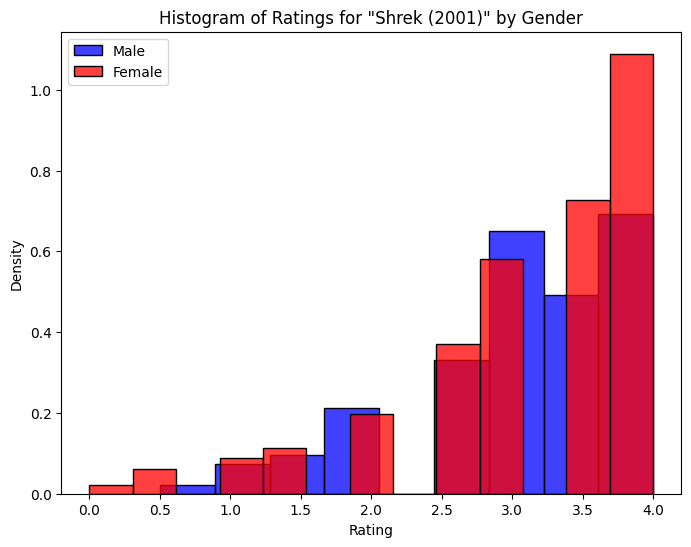

In [17]:
# Plot the histograms of ratings for 'Shrek (2001)' for male and female viewers
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(male_ratings, kde=False, label='Male', color='blue', stat="density", ax=ax)
sns.histplot(female_ratings, kde=False, label='Female', color='red', stat="density", ax=ax)

ax.set_title('Histogram of Ratings for "Shrek (2001)" by Gender')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')
ax.legend()
plt.savefig('q3_distribution.png')
plt.show()

In [18]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


#### Q4 What proportion of movies are rated differently by male and female viewers?

In [19]:
significant_movies = []

# Adjusted significance level for multiple comparisons (Bonferroni correction)
alpha = 0.005 / 400

for movie in df.columns[:400]:

    movie_ratings = df[movie]
    male_ratings = movie_ratings[gender_data == 2].dropna()
    female_ratings = movie_ratings[gender_data == 1].dropna()
    
    if len(male_ratings) > 0 and len(female_ratings) > 0:
        t_stat, p_value = ttest_ind(male_ratings, female_ratings)
        
        if p_value < alpha:
            significant_movies.append(movie)

proportion_different = len(significant_movies) / 400
proportion_different, significant_movies[:10]  

(0.0275,
 ['13 Going on 30 (2004)',
  'The Proposal (2009)',
  'Ghostbusters (2016)',
  '10 Things I Hate About You (1999)',
  'Beauty and the Beauty (1991)',
  'Grease (1978)',
  'Harry Potter and the Deathly Hallows: Part 2 (2011)',
  'Chicago (2002)',
  'Bend it Like Beckham (2002)',
  'The Wolf of Wall Street (2013)'])

In [20]:
len(significant_movies)

11

In [21]:
significant_movies = []

# not Adjusted significance level for multiple comparisons 
alpha = 0.005

for movie in df.columns[:400]:

    movie_ratings = df[movie]
    male_ratings = movie_ratings[gender_data == 2].dropna()
    female_ratings = movie_ratings[gender_data == 1].dropna()
    
    if len(male_ratings) > 0 and len(female_ratings) > 0:
        t_stat, p_value = ttest_ind(male_ratings, female_ratings)
        
        if p_value < alpha:
            significant_movies.append(movie)

proportion_different = len(significant_movies) / 400
proportion_different, significant_movies[:10] 

(0.115,
 ['Django Unchained (2012)',
  'Alien (1979)',
  'Star Wars: Episode IV - A New Hope (1977)',
  '13 Going on 30 (2004)',
  'Sorority Boys (2002)',
  'Inglorious Bastards (2009)',
  'Clueless (1995)',
  'The Exorcist (1973)',
  'Funny Girl (1968)',
  'The Thing (1982)'])

#### Q5 Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [22]:
lion_king_ratings = df['The Lion King (1994)']
only_child_data = df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']
only_child_ratings = lion_king_ratings[only_child_data == 1].dropna()
with_siblings_ratings = lion_king_ratings[(only_child_data == 0) | (only_child_data == -1)].dropna()

t_stat_lion_king, p_value_lion_king = ttest_ind(only_child_ratings, with_siblings_ratings, alternative = 'greater')
t_stat_lion_king, p_value_lion_king

(-2.0450787705974394, 0.979436700331301)

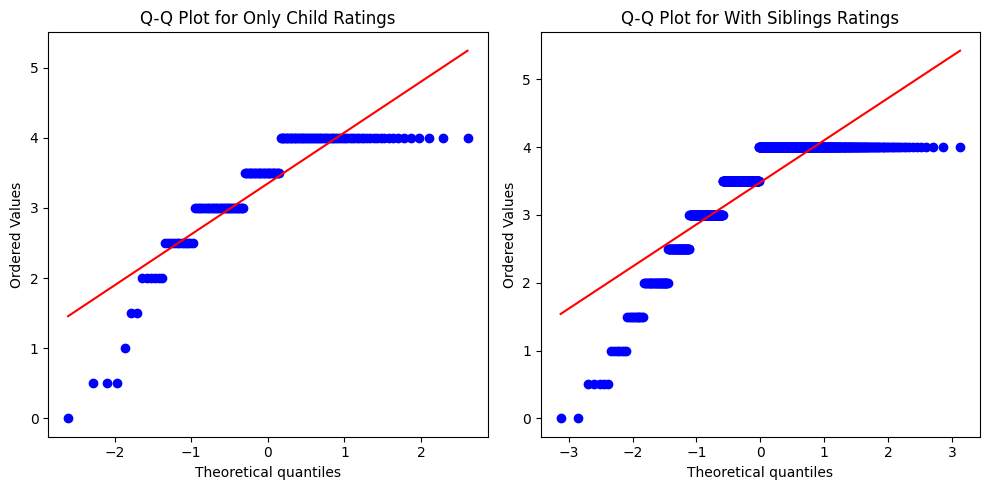

Levene's test statistic: 1.3004327241596456
Levene's test p-value: 0.25442621663113313


In [23]:
from scipy.stats import levene, probplot
import matplotlib.pyplot as plt

# Conduct Levene's test for homoscedasticity
levene_stat, levene_p_value = levene(only_child_ratings, with_siblings_ratings)

# Q-Q plots for normality
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

probplot(only_child_ratings, plot=axes[0])
axes[0].set_title('Q-Q Plot for Only Child Ratings')

probplot(with_siblings_ratings, plot=axes[1])
axes[1].set_title('Q-Q Plot for With Siblings Ratings')

plt.tight_layout()
plt.savefig('q5_qq.png')
plt.show()


print('Levene\'s test statistic:', levene_stat)
print('Levene\'s test p-value:', levene_p_value)


In [24]:
degf = len(only_child_ratings) + len(with_siblings_ratings) - 2
degf

935

In [25]:
len(only_child_ratings)

151

In [26]:
len(with_siblings_ratings)

786

#### Question 6  What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import bootstrap, permutation_test, mannwhitneyu, ttest_rel, normaltest, kstest, kruskal, friedmanchisquare,f_oneway

In [28]:
datas = pd.read_csv("MovieReplicationSet.csv")

In [29]:
datas.iloc[:,475]

0       0
1       0
2       1
3       0
4       1
       ..
1092    0
1093    0
1094    0
1095    0
1096    0
Name: Are you an only child? (1: Yes; 0: No; -1: Did not respond), Length: 1097, dtype: int64

In [30]:
#problem_6
significant_count = 0
for i in range(400):#iterate over each of the 400 movies
    only_child = []
    have_siblings = []
    for j in range(0,1097):
        if pd.isna(datas.iloc[j,i]) or (datas.iloc[j,475]==-1):
            pass
        else:#has answer in both movie rating and only child
            if datas.iloc[j,475]==1:#only child
                only_child.append(datas.iloc[j,i])
            else:#have siblings
                have_siblings.append(datas.iloc[j,i])
    
    #test_data = (np.array(only_child),np.array(have_siblings))
    #p_test = permutation_test(test_data, test_stat_func, n_resamples=int(1e4), random_state=69420)  
    pvalue = mannwhitneyu(only_child,have_siblings).pvalue
    if pvalue<0.005:
        significant_count+=1

In [31]:
significant_count

7

In [32]:
7/400

0.0175

#### Q7 Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [33]:
#problem 7
datas.columns[476]

'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'

In [34]:
matrix_1 = datas.loc[:,['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']].dropna().to_numpy()

In [35]:
matrix_1

array([[4. , 1. ],
       [3. , 1. ],
       [2.5, 0. ],
       ...,
       [3.5, 0. ],
       [2. , 0. ],
       [4. , 1. ]])

In [36]:
social = []#0
alone = []#1
for i in matrix_1:
    if i[1]==0:
        social.append(i[0])
    elif i[1]==1:
        alone.append(i[0])

In [37]:
pvalue = mannwhitneyu(social,alone,alternative="greater").pvalue

In [38]:
pvalue

0.9436657996253056

In [39]:
p = normaltest(alone).pvalue

In [40]:
p

1.0549049474094136e-19

#### Q8 What proportion of movies exhibit such a “social watching” effect?

In [41]:
#problem_8
significant_count = 0
for i in range(400):#iterate over each of the 400 movies
    social = []
    alone = []
    for j in range(0,1097):
        if (pd.isna(datas.iloc[j,i])) or (datas.iloc[j,476]==-1):
            pass
        else:#has answer in both movie rating and social
            if datas.iloc[j,476]==1:#alone
                alone.append(datas.iloc[j,i])
            else:#social
                social.append(datas.iloc[j,i])
    pvalue = mannwhitneyu(social,alone).pvalue
    if pvalue<0.005:
        significant_count+=1

In [42]:
significant_count

10

In [43]:
10/400

0.025

#### Q9 Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’? 

In [44]:
#problem 9 
home_alone = datas['Home Alone (1990)'].dropna()

In [45]:
finding_nemo = datas['Finding Nemo (2003)'].dropna()

In [46]:
kstest(home_alone,finding_nemo)

KstestResult(statistic=0.15269080020897632, pvalue=6.379397182836346e-10, statistic_location=3.0, statistic_sign=1)

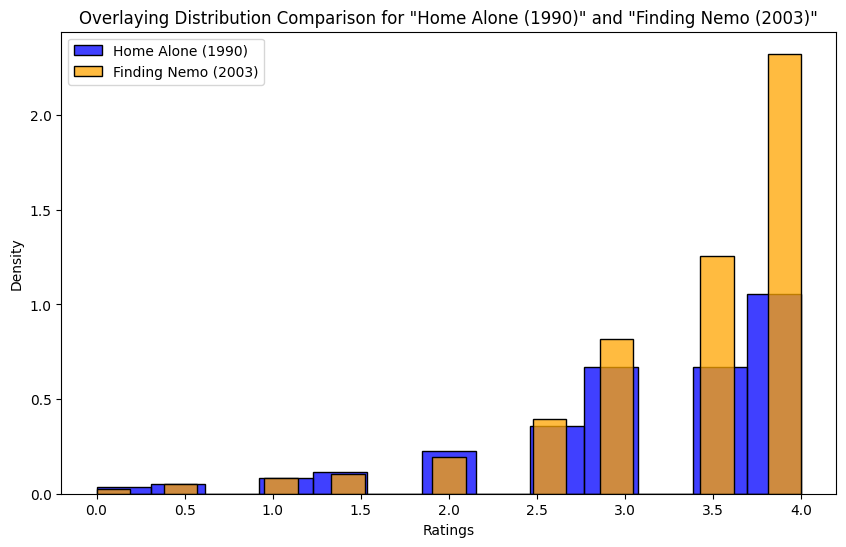

In [47]:
home_alone_ratings = df['Home Alone (1990)'].dropna()
finding_nemo_ratings = df['Finding Nemo (2003)'].dropna()
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(home_alone_ratings, kde=False, label='Home Alone (1990)', color='blue', stat='density', ax=ax)
sns.histplot(finding_nemo_ratings, kde=False, label='Finding Nemo (2003)', color='orange', stat='density', ax=ax)

plt.title('Overlaying Distribution Comparison for "Home Alone (1990)" and "Finding Nemo (2003)"')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.savefig('q9_distribution_plots.png')
plt.show()

#### Q10  There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

In [48]:
#problem 10
sw_series = datas.filter(regex = 'Star Wars')
sw_series.columns

Index(['Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode II - Attack of the Clones (2002)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode 1 - The Phantom Menace (1999)',
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'Star Wars: Episode VI - The Return of the Jedi (1983)'],
      dtype='object')

In [49]:
sw = datas[['Star Wars: Episode IV - A New Hope (1977)','Star Wars: Episode II - Attack of the Clones (2002)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode 1 - The Phantom Menace (1999)',
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'Star Wars: Episode VI - The Return of the Jedi (1983)']].dropna().to_numpy()

In [50]:
sw

array([[4. , 0. , 4. , 0. , 2.5, 4. ],
       [4. , 3.5, 4. , 4. , 4. , 4. ],
       [3. , 4. , 4. , 4. , 4. , 4. ],
       ...,
       [3.5, 3.5, 4. , 3.5, 3.5, 4. ],
       [4. , 3. , 3.5, 4. , 4. , 4. ],
       [3. , 1.5, 3. , 2.5, 4. , 4. ]])

In [51]:
sw1 = sw[:,0]
sw2 = sw[:,1]
sw3 = sw[:,2]
sw4 = sw[:,3]
sw5 = sw[:,4]
sw6 = sw[:,5]

In [52]:
sw_series.columns

Index(['Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode II - Attack of the Clones (2002)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode 1 - The Phantom Menace (1999)',
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'Star Wars: Episode VI - The Return of the Jedi (1983)'],
      dtype='object')

In [53]:
friedmanchisquare(sw1, sw2, sw3, sw4, sw5, sw6)

FriedmanchisquareResult(statistic=274.10740469208264, pvalue=3.6709439947980374e-57)

In [54]:
hp_series = datas.filter(regex = 'Harry Potter')

In [55]:
hp_series.columns

Index(['Harry Potter and the Sorcerer's Stone (2001)',
       'Harry Potter and the Deathly Hallows: Part 2 (2011)',
       'Harry Potter and the Goblet of Fire (2005)',
       'Harry Potter and the Chamber of Secrets (2002)'],
      dtype='object')

In [56]:
hp = datas[['Harry Potter and the Sorcerer\'s Stone (2001)',
       'Harry Potter and the Deathly Hallows: Part 2 (2011)',
       'Harry Potter and the Goblet of Fire (2005)',
       'Harry Potter and the Chamber of Secrets (2002)']].dropna().to_numpy()

In [57]:
hp1 = hp[:,0]
hp2 = hp[:,1]
hp3 = hp[:,2]
hp4 = hp[:,3]

In [58]:
friedmanchisquare(hp1, hp2, hp3, hp4)

FriedmanchisquareResult(statistic=15.918421052632318, pvalue=0.0011785008446512004)

In [59]:
ma_series = datas.filter(regex = 'The Matrix')

In [60]:
ma_series.columns

Index(['The Matrix Revolutions (2003)', 'The Matrix Reloaded (2003)',
       'The Matrix (1999)'],
      dtype='object')

In [61]:
ma = datas[['The Matrix Revolutions (2003)', 'The Matrix Reloaded (2003)',
       'The Matrix (1999)']].dropna().to_numpy()

In [62]:
ma1 = ma[:,0]
ma2 = ma[:,1]
ma3 = ma[:,2]

In [63]:
friedmanchisquare(ma1,ma2,ma3)

FriedmanchisquareResult(statistic=67.62078651685432, pvalue=2.0717281964718423e-15)

In [64]:
ij_series = datas.filter(regex = 'Indiana')
ij_series.columns

Index(['Indiana Jones and the Last Crusade (1989)',
       'Indiana Jones and the Temple of Doom (1984)',
       'Indiana Jones and the Raiders of the Lost Ark (1981)',
       'Indiana Jones and the Kingdom of the Crystal Skull (2008)'],
      dtype='object')

In [65]:
ij = datas[['Indiana Jones and the Last Crusade (1989)',
       'Indiana Jones and the Temple of Doom (1984)',
       'Indiana Jones and the Raiders of the Lost Ark (1981)',
       'Indiana Jones and the Kingdom of the Crystal Skull (2008)']].dropna().to_numpy()

In [66]:
ij1 = ij[:,0]
ij2 = ij[:,1]
ij3 = ij[:,2]
ij4 = ij[:,3]

In [67]:
friedmanchisquare(ij1,ij2,ij3,ij4)

FriedmanchisquareResult(statistic=83.4644655847796, pvalue=5.542750833909764e-18)

In [68]:
jp_series = datas.filter(regex = 'Jurassic')
jp_series.columns

Index(['The Lost World: Jurassic Park (1997)', 'Jurassic Park III (2001)',
       'Jurassic Park (1993)'],
      dtype='object')

In [69]:
jp = datas[['The Lost World: Jurassic Park (1997)', 'Jurassic Park III (2001)',
       'Jurassic Park (1993)']].dropna().to_numpy()

In [70]:
jp1 = jp[:,0]
jp2 = jp[:,1]
jp3 = jp[:,2]

In [71]:
friedmanchisquare(jp1,jp2,jp3)

FriedmanchisquareResult(statistic=76.01454545454507, pvalue=3.116385552875769e-17)

In [72]:
pc_series = datas.filter(regex = 'Pirates of')
pc_series.columns

Index(['Pirates of the Caribbean: Dead Man's Chest (2006)',
       'Pirates of the Caribbean: At World's End (2007)',
       'Pirates of the Caribbean: The Curse of the Black Pearl (2003)'],
      dtype='object')

In [73]:
pc = datas[['Pirates of the Caribbean: Dead Man\'s Chest (2006)',
       'Pirates of the Caribbean: At World\'s End (2007)',
       'Pirates of the Caribbean: The Curse of the Black Pearl (2003)']].dropna().to_numpy()
pc

array([[2. , 1. , 3. ],
       [2. , 3. , 3. ],
       [4. , 4. , 4. ],
       ...,
       [3.5, 3.5, 4. ],
       [3.5, 3.5, 3.5],
       [2.5, 3.5, 4. ]])

In [74]:
pc1 = pc[:,0]
pc2 = pc[:,1]
pc3 = pc[:,2]
friedmanchisquare(pc1,pc2,pc3)

FriedmanchisquareResult(statistic=21.88005780346822, pvalue=1.7733963738836908e-05)

In [75]:
ts_series = datas.filter(regex = 'Toy Story')
ts_series.columns

Index(['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story (1995)'], dtype='object')

In [76]:
ts = datas[['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story (1995)']].dropna().to_numpy()
ts

array([[3. , 3. , 4. ],
       [1. , 4. , 3. ],
       [3. , 3. , 3. ],
       ...,
       [3. , 3.5, 3. ],
       [2.5, 3.5, 3. ],
       [4. , 4. , 4. ]])

In [77]:
ts1 = ts[:,0]
ts2 = ts[:,1]
ts3 = ts[:,2]

In [78]:
friedmanchisquare(ts1,ts2,ts3)

FriedmanchisquareResult(statistic=56.338080495357836, pvalue=5.839037439450979e-13)

In [79]:
bm_series = datas.filter(regex = 'Batman')
bm_series.columns

Index(['Batman & Robin (1997)', 'Batman (1989)',
       'Batman: The Dark Knight (2008)'],
      dtype='object')

In [80]:
bm = datas[['Batman & Robin (1997)', 'Batman (1989)',
       'Batman: The Dark Knight (2008)']].dropna().to_numpy()

In [81]:
bm1= bm[:,0]
bm2 = bm[:,1]
bm3 = bm[:,2]

In [82]:
friedmanchisquare(bm1,bm2,bm3)

FriedmanchisquareResult(statistic=102.47941176470552, pvalue=5.58313952192982e-23)

In [83]:
datas.columns.get_loc('Batman & Robin (1997)')

46

In [84]:
datas.columns.get_loc('Batman (1989)')

181

In [85]:
datas.columns.get_loc('Batman: The Dark Knight (2008)')

235

In [86]:
datas.columns[474]

'Gender identity (1 = female; 2 = male; 3 = self-described)'

#### Extra Credit: We may have heard about the stereotype that male viewers do like Batman movies more than female viewers do. Is this true according to your tests?

In [87]:
#extra credit question
male = []
female = []
for i in [46,181,235]:#iterate over three Batman movies
    for j in range(0,1097):
        if (pd.isna(datas.iloc[j,i])) or (datas.iloc[j,474]==3):
            pass
        else:#identified as male or female and has watched batman
            if datas.iloc[j,474]==1:#female
                female.append(datas.iloc[j,i])
            else:#male
                male.append(datas.iloc[j,i])

In [88]:
mannwhitneyu(male,female,alternative="greater").pvalue

0.11866990804380168